**Understanding The Data**

**Importing requried Libraries**

In [1]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

**Loading The data**

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
print(x_test.shape)

(10000, 28, 28)


**Analyzing the data**

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

In [7]:
import matplotlib.pyplot as plt

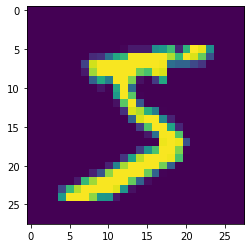

In [8]:
plt.imshow(x_train[0])

**Reshaping the data**

In [9]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')


In [10]:
x_test=x_test.reshape(10000,28,28,1).astype('float32')


**Applying the one hot encoding**

In [11]:
number_of_classes = 10

In [12]:
y_train = np_utils.to_categorical(y_train, number_of_classes)


In [13]:
y_test = np_utils.to_categorical(y_test, number_of_classes)


In [14]:
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Add CNN layer**

In [15]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

**Compiling the data**

In [16]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])


**Train the model**

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 202s 107ms/step - loss: 0.2047 - accuracy: 0.9498 - val_loss: 0.0802 - val_accuracy: 0.9738
Epoch 2/5
1875/1875 [==============================] - 200s 107ms/step - loss: 0.0690 - accuracy: 0.9790 - val_loss: 0.0899 - val_accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 198s 105ms/step - loss: 0.0503 - accuracy: 0.9838 - val_loss: 0.0842 - val_accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0912 - val_accuracy: 0.9776
Epoch 5/5
1875/1875 [==============================] - 200s 107ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.1098 - val_accuracy: 0.9778


**Observing the metrics**

In [18]:
metrics=model.evaluate(x_test,y_test,verbose=0)


In [19]:
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.10976149886846542, 0.9778000116348267]


**Test the Model**

In [20]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 117ms/step
[[1.3922582e-11 8.7426438e-23 2.2638085e-12 4.7380951e-08 7.6070399e-18
  1.7550404e-16 6.6172455e-22 1.0000000e+00 7.4774587e-10 1.1939916e-10]
 [2.9333688e-10 6.3614789e-09 1.0000000e+00 3.0650014e-16 6.8758631e-14
  1.8744331e-17 1.6536015e-09 2.4857257e-22 2.7318164e-15 2.2364942e-21]
 [4.4935076e-12 9.9998856e-01 3.0374764e-07 5.7136164e-13 1.1044964e-05
  1.1892427e-08 7.1149351e-08 4.0199655e-08 3.1477811e-08 3.5817579e-12]
 [9.9999964e-01 3.6665724e-18 5.2432678e-13 1.1341735e-14 1.1216760e-11
  2.8565347e-16 3.8692423e-07 2.0041686e-13 3.4452136e-11 3.6931571e-08]]


**Observing the metrics**

In [21]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.10976149886846542, 0.9778000116348267]


**Test the model**

In [22]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 30ms/step
[[1.3922582e-11 8.7426438e-23 2.2638085e-12 4.7380951e-08 7.6070399e-18
  1.7550404e-16 6.6172455e-22 1.0000000e+00 7.4774587e-10 1.1939916e-10]
 [2.9333688e-10 6.3614789e-09 1.0000000e+00 3.0650014e-16 6.8758631e-14
  1.8744331e-17 1.6536015e-09 2.4857257e-22 2.7318164e-15 2.2364942e-21]
 [4.4935076e-12 9.9998856e-01 3.0374764e-07 5.7136164e-13 1.1044964e-05
  1.1892427e-08 7.1149351e-08 4.0199655e-08 3.1477811e-08 3.5817579e-12]
 [9.9999964e-01 3.6665724e-18 5.2432678e-13 1.1341735e-14 1.1216760e-11
  2.8565347e-16 3.8692423e-07 2.0041686e-13 3.4452136e-11 3.6931571e-08]]


**Save the model**

In [23]:
model.save('models/mnistCNN.h5')

**Test with the saved model**

In [30]:
from tensorflow.keras.models import load_model
model=load_model(r'/content/models/mnistCNN.h5')

In [31]:
from PIL import Image
import numpy as np

In [44]:
for index in range(4):
    img=Image.open('/content/model'+str(index)+'.png').convert("L")
    img=img.resize((28,28))
    im2arr=np.array(img)
    im2arr=im2arr.reshape(1,28,28,1)
    y_pred=model.predict(im2arr)
    print(y_pred)

1/1 [==============================] - 0s 25ms/step
[[0.16067973 0.09226117 0.09167313 0.08354129 0.0768126  0.08407997
  0.11467315 0.06243611 0.13342252 0.10042025]]
1/1 [==============================] - 0s 27ms/step
[[0.09861141 0.11253409 0.09871862 0.09369871 0.10266303 0.09737602
  0.09788595 0.09833895 0.10221104 0.09796218]]
1/1 [==============================] - 0s 25ms/step
[[0.10774394 0.10674519 0.07198092 0.10719547 0.10149419 0.08737824
  0.13470022 0.10676296 0.08693494 0.08906391]]
1/1 [==============================] - 0s 23ms/step
[[0.01619259 0.02456826 0.6171782  0.2145423  0.03584081 0.03076315
  0.00599817 0.02842917 0.01848478 0.0080027 ]]
